<img src="enset.png" width="200" height="50" style="float: right; margin-left: 0px;">

<u><h1>Systèmes Décisionnels & Data-Mining</h1></u>



## Atelier 1 : Régression Logistique

Dans la première et deuxième partie de cet atelier, on va utiliser la base de données Advertising. Alors, l’objectif principal est de créer un modèle de régression pour prédire la variable Sales. La troisième partie traite le problème de classification en appliquant la régression logistique sur la base de données diabetescsv.csv. Pour cela, on commence à savoir comment :
- Récupérer des données à partir d’un fichier csv et découvrir ses principales caractéristiques.
- Visualiser les données sous forme de graphe.
phe.

<span style="background-color: yellow;">Partie 1 : Régression linéaire simple</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

> 1. Récupérer des données à partir du fichier `advertising.csv` et découvrir ses principales caractéristiques.


In [2]:
csv_file = 'datasets/advertising.csv'
df = pd.read_csv(csv_file)

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.shape

(200, 4)

> 2. Initialiser X (predictors, variable indépendante) par la variable TV et y (cible, variable dépendante).

In [5]:
X = df['TV']
y = df['Sales']

> 3. Pourquoi il s’agit d’un problème de régression

Il s'agit d'un problème de régression car nous cherchons à prédire une variable continue (Sales) en fonction d'une autre variable (TV).

> 4. Visualiser la base de données avec matplotlib.

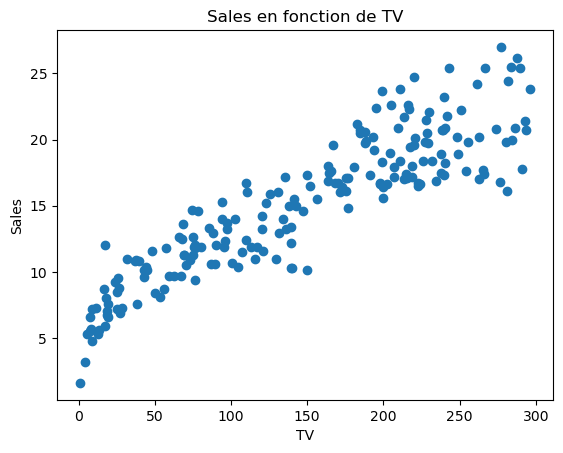

In [6]:
plt.scatter(X, y)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Sales en fonction de TV')
plt.show()

> 5. Soit le modèle de régression linéaire simple définit par

$$
y = w_{0} + w_{1}x
$$

>>a) l’aide de train test split de sklearn.model selection, diviser la base de donn ́ees en base d’apprentissage et base
de test (80% pour la base d’apprentissage et 20% pour la base de test )

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((160,), (40,), (160,), (40,))

>>(b) Définir une fonction MSE(X,y,W) qui retourne la moyenne des erreurs entre la valeur théorique et la valeur réelle.

La fonction de Mean Squared Error (MSE), ou erreur quadratique moyenne, est définie comme suit:

$$ \text{MSE}(X, y, W) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

où : <br>
<p> 
    \( N \) est le nombre total d'échantillons,
</p>
<p> 
    \( y_i \) est la valeur réelle de \( i \),
</p>
<p> 
    \( \hat{y}_i \) est la valeur prédite de \( i \), calculée comme \( \hat{y}_i = w_0 + w_1x_i \).
</p>

In [8]:
def MSE(X, y, W):
    return np.mean((y - (W[0] + W[1] * X))**2)

>>(c) Définir la fonction Gradient(X,y,W).

In [9]:
def Gradient(X, y, W):
    N = len(y)
    y_pred = W[0] + W[1] * X
    
    dW0 = -2/N * np.sum(y - y_pred)
    dW1 = -2/N * np.sum(X * (y - y_pred))
    
    return np.array([dW0, dW1])

>>(d) Etablir une fonction de mise à jour des paramétres W MiseJour(grad,W,alpha).

In [10]:
def Mise_a_Jour(grad, W, alpha):
    W_new = W - alpha * grad
    return W_new

>>(e) Ecrire la fonction Batch Gradient Descent(X,y,W,N max,alpha,eps), qui retourne les meilleurs paramétres estimés et de plus affiche l'évolution de MSE aprés chaque itération.

In [11]:
def Batch_Gradient_Descent(X, y, W, N_max, alpha, eps):
    mse_history = [MSE(X, y, W)]
    
    for i in range(N_max):
        grad = Gradient(X, y, W)
        W = Mise_a_Jour(grad, W, alpha)
        mse_history.append(MSE(X, y, W))
                
        if abs(mse_history[-1] - mse_history[-2]) < eps:
            break

    plt.plot(mse_history)
    plt.xlabel('Itération')
    plt.ylabel('MSE')
    plt.title('Évolution de MSE au cours de la descente de gradient')
    plt.show()
    return W

>>(f) Tracer l’MSE.

C:\Users\fatim\AppData\Local\Temp\ipykernel_24528\3170673145.py:9: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(mse_history[-1] - mse_history[-2]) < eps:
C:\Users\fatim\AppData\Local\Temp\ipykernel_24528\2569960049.py:2: RuntimeWarning: invalid value encountered in subtract
  W_new = W - alpha * grad


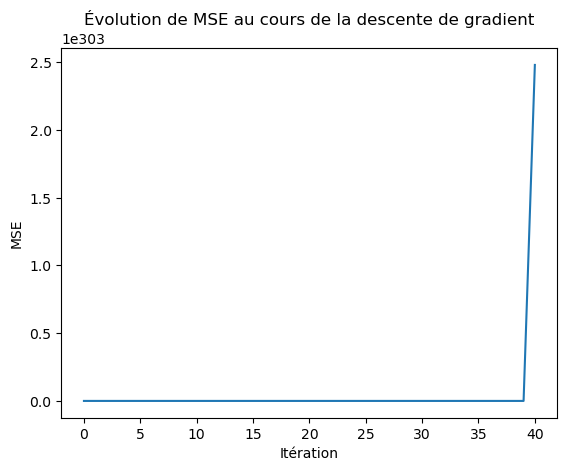

In [13]:
import numpy as np
W_init = np.array([0, 0]) 
N_max = 100
alpha = 0.1 
eps = 0.000001
W_opt = Batch_Gradient_Descent(X, y, W_init, N_max, alpha, eps)

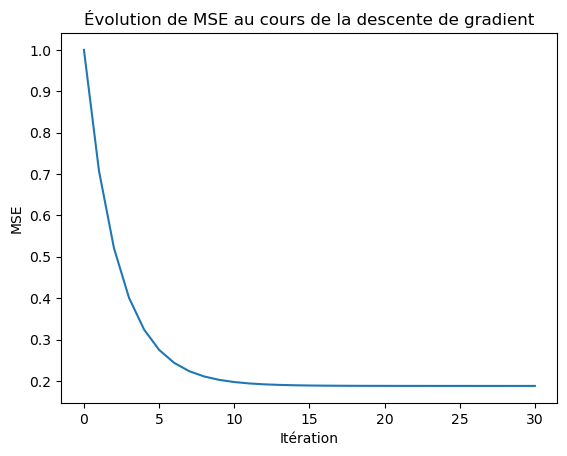

In [14]:
X_normalized = (X - np.mean(X)) / np.std(X)
y_normalized = (y - np.mean(y)) / np.std(y)
w = Batch_Gradient_Descent(X_normalized, y_normalized, W_init, N_max, alpha, eps)

Cette etape s'appele la normalisation de données , après cette derniere l'algorithme de descente de gradient a pu mettre à jour les poids 
W de manière plus équilibrée et efficace, sans qu'aucune caractéristique ne domine l'autre en raison de sa plus grande échelle.

>> (g) Donner l’erreur de ce modéle.

In [15]:
X_test_normalized = (X_test - np.mean(X)) / np.std(X)
y_pred_normalized = w[0] + w[1] * X_test_normalized
y_pred = y_pred_normalized * np.std(y) + np.mean(y)
mse_test = np.mean((y_test - y_pred)**2)
print(f"MSE: {mse_test}")

MSE: 6.089948192268001
